# Chapter 3: Qiskit
### Qiskit 2.X

$Qiskit$ is an open-source software development kit (SDK) for working with quantum computers at the level of circuits and algorithms , IBM Quantum, https:$//quantum-computing.ibm.com/$

##  $Qiskit$ version

In [56]:
import qiskit
qiskit.version.get_version_info()

'2.0.0'

# Example: Quantum Coin

We start with a very simple example, the quantum coin. The quantum coin is defined with the basis stat as $| 0  \rangle$

 \begin{equation}
H \cdot | 0  \rangle = \frac{1}{\sqrt{2}} \cdot  | 0 \rangle+ \frac{1}{\sqrt{2}} \cdot  |1 \rangle
\end{equation}


first we load the necessary libraries 

In [57]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 

Hadamard  matrix $H$ is represented in  $qiskit$  by the Hadamard gate $qc.h(qubit)$ where $qc$ is a quantum circuit with the name $qc$.
First we define a quantum circuit and draw it

In [58]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

In the next step we will perform a  $statevector$  simulation and plot the result in a histogram. Two generated new states represented by one qubit. The state vector of the circuit can represent the probability values that correspond to the multiplication of the state vector by the unitary matrix $H$. Total count are: $\{'0': 0.5, '1': 0.5\}$ indicating the probability values.


Total count are: {np.str_('0'): np.float64(0.5), np.str_('1'): np.float64(0.5)}


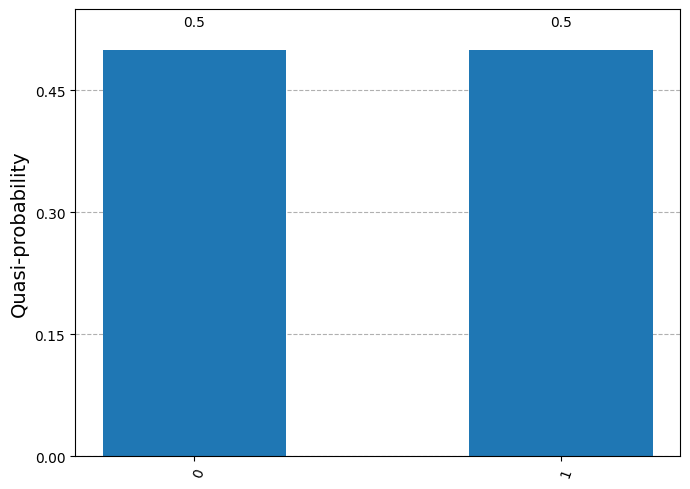

In [59]:

simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

We can represent the state vector before the measurement indicating its amplitude values using the build in LaTeX command 

In [60]:
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

If we change out quantum circuit to represent the mapping using a NOT gate $X$, we get different amplitudes

In [61]:
qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)

qc.draw()

┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘


Total count are: {np.str_('0'): np.float64(0.5), np.str_('1'): np.float64(0.5)}


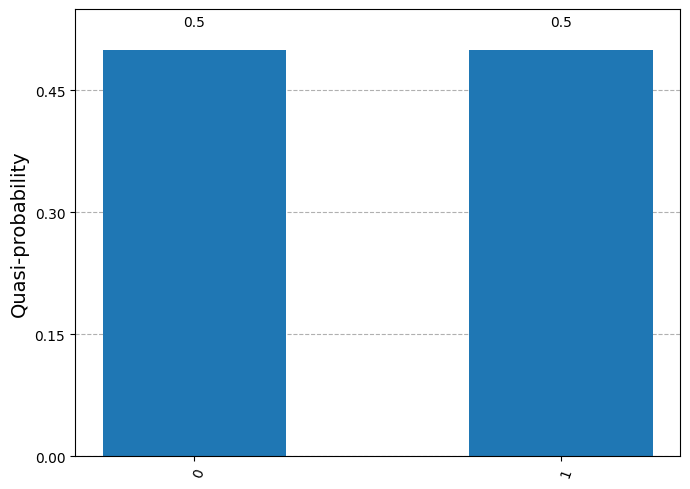

In [62]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

In [63]:
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [64]:

print(final_state)

Statevector([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j],
            dims=(2,))


## Qasm Simulator Evaluation

The $qasm simulator$ promises to behave like an actual device of today, which is prone to noise resulting from decoherence. 
It returns couns, which is a sampling of the measured qubits that have to be defined in the circuit, the measured values are stored in conventional bits.
In our example of quantum coin we define by the command $qc = QuantumCircuit(1,1)$ a quantum circuit, the first number indicates the number of quantum qubits, the second of conventional bits.
The command $qc.measure(0,0)$ indicated that we measure the qubit (the counting begins with zero and not one) and 
store the result of the measurement in the conventional bit $c$

In [65]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.measure(0,0)
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

The command $result=simulator.run(qc,shots=10).result()$ runs the simulator $10$ times, the number of samples (shots) is  indicated by the command $qc,simulator,shots=10$.  A  histogram represents the frequency of the two states $0$ and $1$   as measured by one bit


Total count are: {'0': 4, '1': 6}


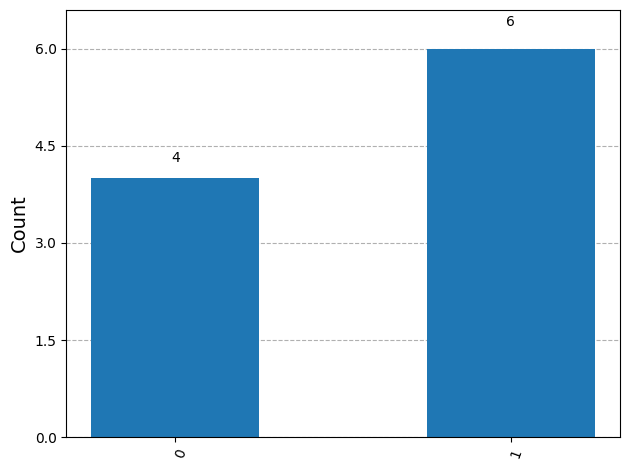

In [66]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=10).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The number of samples is $100$


Total count are: {'0': 64, '1': 36}


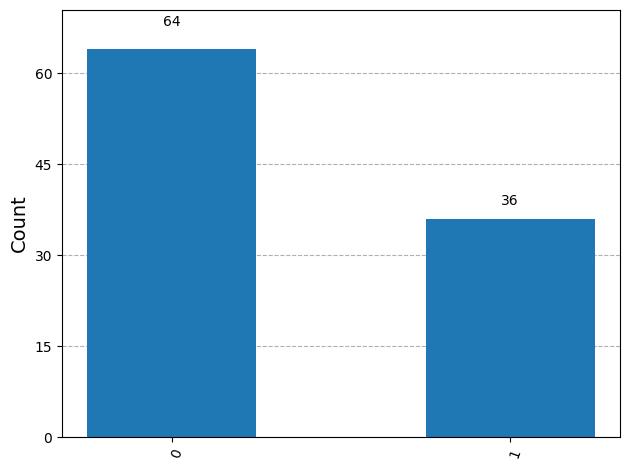

In [67]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=100).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The number of samples is $1000$


Total count are: {'1': 492, '0': 508}


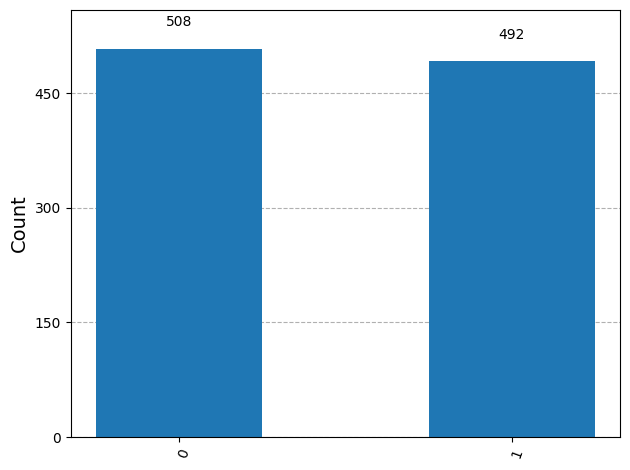

In [68]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The number of samples is $10000$


Total count are: {'1': 5107, '0': 4893}


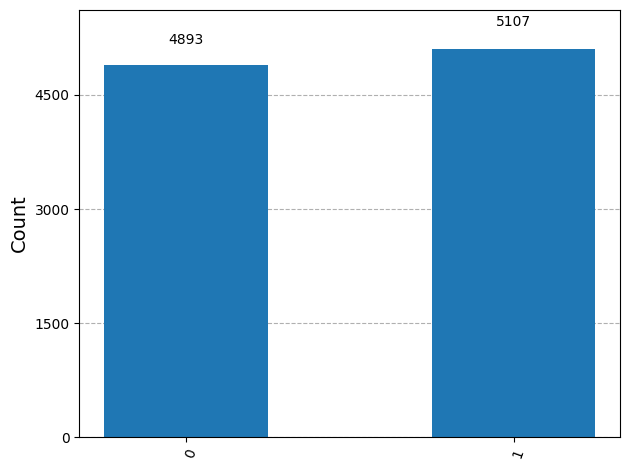

In [69]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

Applying the quantum coin twice
$ H  \cdot \left(\frac{1}{\sqrt{2}} \cdot  | 0 \rangle+ \frac{1}{\sqrt{2}} \cdot  |1 \rangle \right) =   H  \cdot \frac{1}{\sqrt{2}} \cdot  | 0 \rangle+H \cdot \frac{1}{\sqrt{2}} \cdot  |1 \rangle=  | 0 \rangle $


In [70]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.h(0)

qc.measure(0,0)

qc.draw()

┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0


Total count are: {'0': 1024}


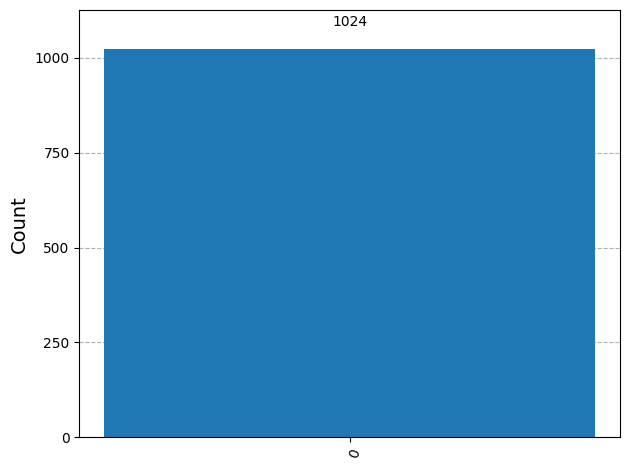

In [71]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

## Matrix Representation
The Hadamard operator $H_3$ maps $3$ qubits  $|000 \rangle$ representing a basis state in a Hilbert space $\mathcal{H}_{2^3}$ 

In [72]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘


Total count are: {np.str_('000'): np.float64(0.125), np.str_('001'): np.float64(0.125), np.str_('010'): np.float64(0.125), np.str_('011'): np.float64(0.125), np.str_('100'): np.float64(0.125), np.str_('101'): np.float64(0.125), np.str_('110'): np.float64(0.125), np.str_('111'): np.float64(0.125)}


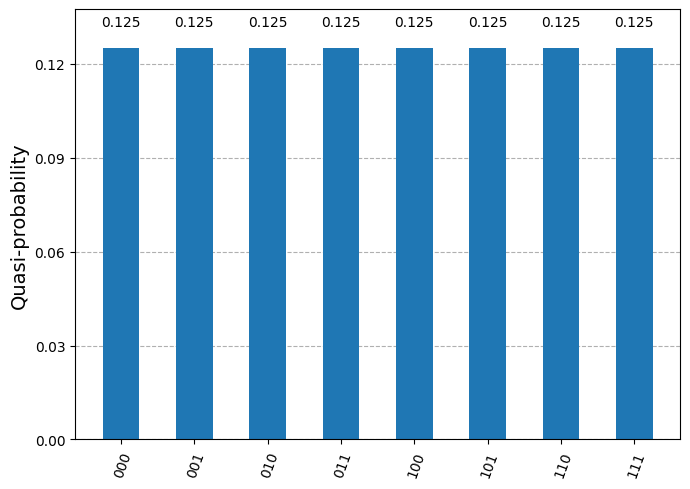

In [73]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

In [74]:
final_state = simulator.run(qc).result().get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

We can represent  the quantum circuit by a matrix with the following commands. You have to run the qasm simulator and we will use NumPy that is included in the qiskit installation. NumPy  is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices that is highly related to MATLAB

In [75]:
import numpy as np
from qiskit.visualization import array_to_latex


simulator = Aer.get_backend('qasm_simulator')
qc.save_unitary()
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("\nSize of the unitary matrix:",np.asarray(unitary).shape)
array_to_latex(unitary, prefix="\\text{Circuit = }\n")


Size of the unitary matrix: (8, 8)


<IPython.core.display.Latex object>

# Quantum Circuits

The four bit conjunction $x  \wedge y  \wedge z  \wedge v$ requires three quantum Toffoli gates $ccX$ and three additional qubits that are  zero.
The input:
$ | x \rangle |y \rangle | 0 \rangle |z \rangle  |0  \rangle |v\rangle  |0  \rangle. $
First quantum Toffoli gate
$ \left ( CCX \cdot   | x \rangle |y \rangle | 0\rangle \right) \otimes \left( I_4 |\cdot |z \rangle  |0  \rangle |v\rangle  |0  \rangle \right) =| x \rangle |y \rangle |   x \wedge y \rangle |z \rangle  |0  \rangle |v\rangle  |0  \rangle.  $
 Second quantum Toffoli gate
$ \left ( I_2 \cdot   | x \rangle |y \rangle \right) \otimes \left( CCX \cdot | x \wedge y \rangle  |z \rangle  |0 \right) \otimes  \left( I_2 \cdot  |v\rangle  |0  \rangle \right)  $
 $  =| x \rangle |y \rangle |   x \wedge y \rangle |z \rangle  | x \wedge y \wedge z  \rangle |v\rangle  |0  \rangle.  $
Third quantum Toffoli gate
$ \left( I_4 \cdot|  x \rangle |y \rangle |   x \wedge y \rangle |z \rangle \right) \otimes \left( CCX \cdot   | x \wedge y \wedge z  \rangle   |v\rangle  |0  \rangle \right)  $
 $ = | x \rangle |y \rangle |   x \wedge y \rangle |z \rangle  | x \wedge y \wedge z  \rangle |v\rangle  |x \wedge y \wedge z  \wedge v  \rangle. $
The circuit corresponds to the following unitary mapping
$  \left( \left(I_4 \otimes CCX \right)  \left(I_2 \otimes CCX \otimes I_2\right)  \cdot \left(CCX \otimes I_4 \right) \right) \cdot |xy0z0v0  \rangle $
with the result
$  | x \rangle |y \rangle |   x \wedge y \rangle |z \rangle  | x \wedge y \wedge z  \rangle |v\rangle  |x \wedge y \wedge z  \wedge v  \rangle. $



We define a quantum circuit with seven qubits and name them using the command $QuantumRegister(size,name)$, with $size$ is number of qubits to include in the register and the name of the register as it appears ti the drawing of the quantum circuit. We create the register $x$, $y$, $z$ $v$, two auxiliary register and a register $r$ with the name $result$ and generate the quantum circuit with the command $QuantumCircuit(x,y,z,v,aux,r)$. We initialize the qubits $x$, $y$, $z$ $v$ to one with the not gate $X$. Note, we change the order of the $aux$ qubits to make it cleared to read. After the initialization we use the command $qc.barrier()$ will separate the representation in the circuit. It is not a gate and prevents the merging of the gate operations during the computation. Then we use three  three quantum Toffoli gates, also called the ccX gate (CCNOT gate - controlled controlled not gate) and the final result or the operation is represented in the quantum qubit $r$.

In [76]:
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

In [77]:
x = QuantumRegister(1, 'x')
y = QuantumRegister(1, 'y')
z = QuantumRegister(1, 'z')
v = QuantumRegister(1, 'v')

aux =  QuantumRegister(2,'aux')

r = QuantumRegister(1, 'result')

qc = QuantumCircuit(x,y,z,v,aux,r)

qc.x(x)
qc.x(y)
qc.x(z)
qc.x(v)

qc.barrier()

qc.ccx(x,y,aux[0])
qc.ccx(aux[0],z,aux[1])
qc.ccx(aux[1],z,r)

qc.draw()

┌───┐ ░                
     x: ┤ X ├─░───■────────────
        ├───┤ ░   │            
     y: ┤ X ├─░───■────────────
        ├───┤ ░   │            
     z: ┤ X ├─░───┼────■────■──
        ├───┤ ░   │    │    │  
     v: ┤ X ├─░───┼────┼────┼──
        └───┘ ░ ┌─┴─┐  │    │  
 aux_0: ──────░─┤ X ├──■────┼──
              ░ └───┘┌─┴─┐  │  
 aux_1: ──────░──────┤ X ├──■──
              ░      └───┘┌─┴─┐
result: ──────░───────────┤ X ├
              ░           └───┘

After the statevector ``measurement'' the values of the qubits  the qubits are  $x=1$, $y=1$, $z=1$,  $v=1$, $aux_0=1$, $aux_1=1$ and $result=1$. The total count are: $\{'1111111': 1.0\}$, 1.0 indicates the probability one.


Total count are: {np.str_('1111111'): np.float64(1.0)}


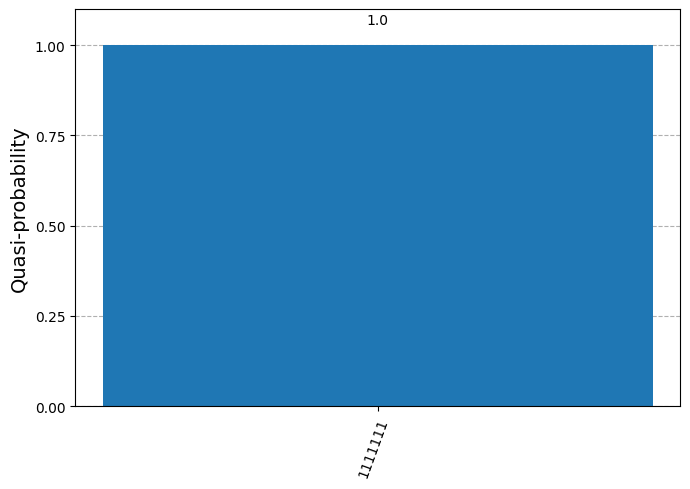

In [78]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

## Un-computing
 
 The qubits  $aux_0$=1, $aux_1=1$ are usually not required for further computation because the result is represented in the  output qubit $result$. 
 However they are entangled with the output qubit. It is not possible to reset them to zero. 
 Instead  they are un-computed. Because for the matrix  $CCX^{-1}=CCX$, we recompute the first and the second quantum Toffoli gate after determining the result. The steps are reversed as indicated in the listing after the command $qc.barrier()$

In [79]:
qc = QuantumCircuit(7)

x = QuantumRegister(1, 'x')
y = QuantumRegister(1, 'y')
z = QuantumRegister(1, 'z')
v = QuantumRegister(1, 'v')

aux =  QuantumRegister(2,'aux')

r = QuantumRegister(1, 'result')

qc = QuantumCircuit(x,y,z,v,aux,r)

qc.x(x)
qc.x(y)
qc.x(z)
qc.x(v)

qc.barrier()

qc.ccx(x,y,aux[0])
qc.ccx(aux[0],z,aux[1])
qc.ccx(aux[1],z,r)

qc.ccx(aux[0],z,aux[1])
qc.ccx(x,y,aux[0])

qc.draw()


┌───┐ ░                          
     x: ┤ X ├─░───■───────────────────■──
        ├───┤ ░   │                   │  
     y: ┤ X ├─░───■───────────────────■──
        ├───┤ ░   │                   │  
     z: ┤ X ├─░───┼────■────■────■────┼──
        ├───┤ ░   │    │    │    │    │  
     v: ┤ X ├─░───┼────┼────┼────┼────┼──
        └───┘ ░ ┌─┴─┐  │    │    │  ┌─┴─┐
 aux_0: ──────░─┤ X ├──■────┼────■──┤ X ├
              ░ └───┘┌─┴─┐  │  ┌─┴─┐└───┘
 aux_1: ──────░──────┤ X ├──■──┤ X ├─────
              ░      └───┘┌─┴─┐└───┘     
result: ──────░───────────┤ X ├──────────
              ░           └───┘


After the statevector ``measurement'' the values of the qubits  the qubits are  $x=1$, $y=1$, $z=1$,  $v=1$, $aux_0=0$, $aux_1=0$ and $result=1$


Total count are: {np.str_('1001111'): np.float64(1.0)}


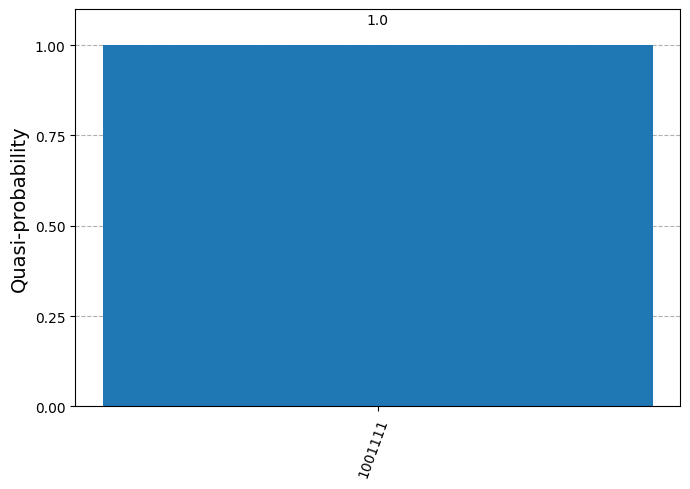

In [80]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

In [81]:
simulator = Aer.get_backend('qasm_simulator')
qc.save_unitary()
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("\nSize of the unitary matrix:",np.asarray(unitary).shape)


Size of the unitary matrix: (128, 128)


## General multi-controlled X gate

Instead one can used as well the command $MCXGate(4)$ without the need of defining auxiliary registers. The $MCXGate(n)$ general, multi-controlled X gate that is controled by $n$ qubits, in our case by the qubits $x,y,z,v,r$

In [82]:
from qiskit.circuit.library import MCXGate


x = QuantumRegister(1, 'x')
y = QuantumRegister(1, 'y')
z = QuantumRegister(1, 'z')
v = QuantumRegister(1, 'v')
r = QuantumRegister(1, 'result')

qc = QuantumCircuit(x,y,z,v,r)


qc.x(x)
qc.x(y)
qc.x(z)
qc.x(v)

qc.barrier()

gate = MCXGate(4)

qc.append(gate,[x,y,z,v,r])

qc.draw()

┌───┐ ░      
     x: ┤ X ├─░───■──
        ├───┤ ░   │  
     y: ┤ X ├─░───■──
        ├───┤ ░   │  
     z: ┤ X ├─░───■──
        ├───┤ ░   │  
     v: ┤ X ├─░───■──
        └───┘ ░ ┌─┴─┐
result: ──────░─┤ X ├
              ░ └───┘


Total count are: {np.str_('11111'): np.float64(1.0)}


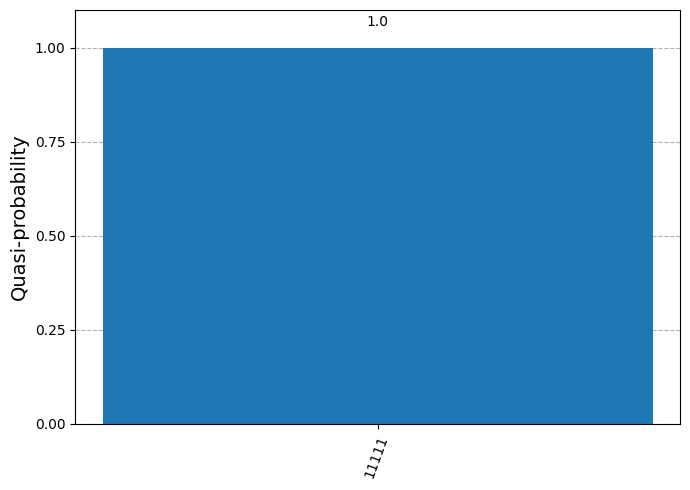

In [83]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

In [84]:
simulator = Aer.get_backend('qasm_simulator')
qc.save_unitary()
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("\nSize of the unitary matrix:",np.asarray(unitary).shape)


Size of the unitary matrix: (32, 32)


 ## $OR$ operation

 The $OR$ operation is represented by the unitary mapping according to the  De Morgan's laws 
 $ x_1 \vee x_2=\neg(\neg x_1 \wedge,\neg x_2)$
 $    \left( \left( I_2 \otimes     X \right)     \cdot  CCX \cdot \left(X \otimes  X \otimes  I_1  \right)  \right) \cdot   |xy0  \rangle = 
 xy(x \vee y)  \rangle. $

In [85]:
x = QuantumRegister(1, 'x')
y = QuantumRegister(1, 'y')

r = QuantumRegister(1, 'result')

qc = QuantumCircuit(x,y,r)

#Preparation

qc.x(x)
#qc.x(y)

qc.barrier()

#Or Operation according to De Morgan's law

qc.x(x)
qc.x(y)
qc.x(r)

qc.ccx(x,y,r)

qc.x(x)
qc.x(y)

qc.draw()

┌───┐ ░ ┌───┐     ┌───┐
     x: ┤ X ├─░─┤ X ├──■──┤ X ├
        └───┘ ░ ├───┤  │  ├───┤
     y: ──────░─┤ X ├──■──┤ X ├
              ░ ├───┤┌─┴─┐└───┘
result: ──────░─┤ X ├┤ X ├─────
              ░ └───┘└───┘


Total count are: {np.str_('101'): np.float64(1.0)}


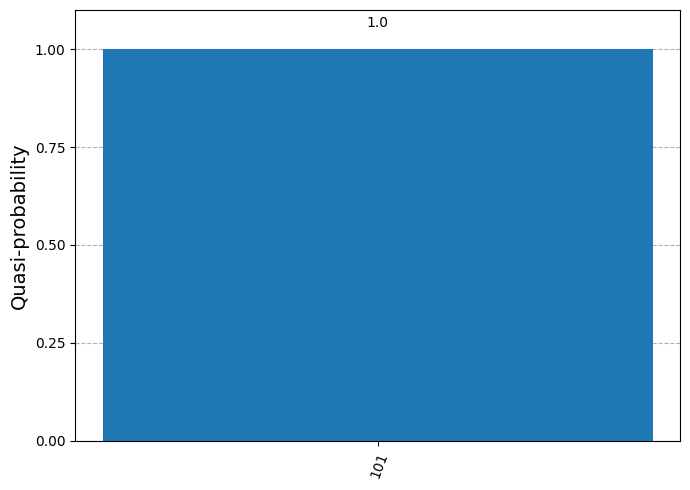

In [86]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

# Deutsch Algorithm

The Deutsch algorithm  exploits the superposition of qubits generated by Hadamard gates and is more powerful than any classical algorithm. It determines if an unknown function $f: \textbf{B}^1 \rightarrow \textbf{B}^1:f(x)=y$ of one bit is constant or not by calling the function one time. A classical algorithm requires two calls. 
A constant function on one bit is either $f(x)=1$ or $f(x)=0$. A non constant function is either the identity function $f(0)=0$ and $f(1)=1$ or the flip function $f(0)=1$ and $f(1)=0$. 

In the first step of the algorithm we build a superposition of two qubits
$ H_2 \cdot |0 1\rangle =    H_1 \cdot |0  \rangle  \otimes H_1 \cdot |1  \rangle=  \left(\frac{|0  \rangle + |1  \rangle}{\sqrt{2}} \right) \otimes    
\left(\frac{|0  \rangle - |1  \rangle}{\sqrt{2}} \right) =  $
$  H2 \cdot |0 1\rangle =   \frac{1}{2}  \cdot \left( |00 \rangle -  |01 \rangle +  |10 \rangle -  |11 \rangle  \right). $


In [87]:
qc = QuantumCircuit(2)

qc.x(0)

qc.h(0)
qc.h(1)


In [88]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In the second step we apply the $U_f,$ gate.
\begin{equation}
  U_f \cdot H_2 \cdot |0 1\rangle =  U_f \left(  \frac{1}{2}  \cdot \left( |00 \rangle -  |01 \rangle +  |10 \rangle -  |11 \rangle  \right)  \right)
\end{equation}  


In the third step a Hadamard gate is applied to the first qubit
\begin{equation}
\left(H_1 \otimes I_1 \right) \cdot U_f \cdot H_2 \cdot |0 1\rangle. 
\end{equation}

In the fourth step the first qubit (that is in the basis state) is measured. It is $ |0  \rangle$ if the function is  constant, otherwise $|1  \rangle$.

In our simulation for simplicity we assume the unknown function is the  the identity mapping  $f(x)=0$  


In [89]:
qc = QuantumCircuit(2,1)

qc.x(0)

qc.barrier()

qc.h(0)
qc.h(1)

#constant function f(x)=0
qc.barrier()
qc.h(1) 
qc.measure(1,0)

qc.draw()

┌───┐ ░ ┌───┐ ░         
q_0: ┤ X ├─░─┤ H ├─░─────────
     └───┘ ░ ├───┤ ░ ┌───┐┌─┐
q_1: ──────░─┤ H ├─░─┤ H ├┤M├
           ░ └───┘ ░ └───┘└╥┘
c: 1/══════════════════════╩═
                           0

 In the fourth step the first qubit (that is in the basis state) is measured. It is $ |0  \rangle$, the function is  constant. Total count are: $\{''0': 1024\}$. By default the number of shots is $1024$ if not specified.


Total count are: {'0': 1}


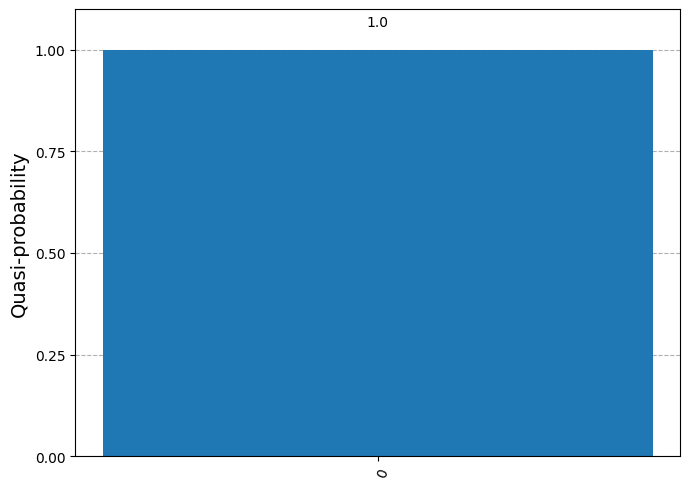

In [90]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)